In [1]:
# Web scrapper code and fetching relavant data for further working
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pandasql as ps
import csv
url=requests.get("https://covid19.apple.com/mobility.com")
soup=BeautifulSoup(url.content, "html.parser")
links=soup.find_all('a')
all_links=[]
for link in links:
    all_links.append(link.get('href'))
datalink="https://covid19-static.cdn-apple.com/covid19-mobility-data/2211HotfixDev7/v3/en-us/applemobilitytrends-2022-03-31.csv"
data=pd.read_csv(datalink,low_memory=False)
print(data)


            geo_type        region transportation_type alternative_name  \
0     country/region       Albania             driving              NaN   
1     country/region       Albania             walking              NaN   
2     country/region     Argentina             driving              NaN   
3     country/region     Argentina             walking              NaN   
4     country/region     Australia             driving               AU   
...              ...           ...                 ...              ...   
4686          county   York County             walking              NaN   
4687          county  Young County             driving              NaN   
4688          county   Yuba County             driving              NaN   
4689          county   Yuma County             driving              NaN   
4690          county   Yuma County             walking              NaN   

        sub-region        country  2020-01-13  2020-01-14  2020-01-15  \
0              NaN        

In [2]:
# Checking the accessibility of sql and forming sample table for same
finalTable = ps.sqldf("select region,`2020-01-13` as '13Jan2020',`2020-01-14` as '14Jan2020',`2020-01-15` as '15Jan2020',`2020-01-16` as '16Jan2020',`2020-01-17` as '17Jan2020' from data limit 4000")
finalTable

,region,13Jan2020,14Jan2020,15Jan2020,16Jan2020,17Jan2020
0,Albania,100.0,95.30,101.43,97.20,103.55
1,Albania,100.0,100.68,98.93,98.46,100.85
2,Argentina,100.0,97.07,102.45,111.21,118.45
3,Argentina,100.0,95.11,101.37,112.67,116.72
4,Australia,100.0,102.98,104.21,108.63,109.08
...,...,...,...,...,...,...
3995,Portsmouth City,100.0,100.52,104.49,104.83,111.18
3996,Posey County,100.0,98.97,112.17,96.14,119.95
3997,Pottawatomie County,100.0,102.65,104.07,107.37,122.59
3998,Pottawatomie County,100.0,125.14,119.05,119.19,101.82


In [3]:
#using melt function to transpose the data from coloumn to row
finalTable1 = finalTable.melt(id_vars=['region'],var_name = 'date', value_name = 'casesCount')
finalTable1

,region,date,casesCount
0,Albania,13Jan2020,100.00
1,Albania,13Jan2020,100.00
2,Argentina,13Jan2020,100.00
3,Argentina,13Jan2020,100.00
4,Australia,13Jan2020,100.00
...,...,...,...
19995,Portsmouth City,17Jan2020,111.18
19996,Posey County,17Jan2020,119.95
19997,Pottawatomie County,17Jan2020,122.59
19998,Pottawatomie County,17Jan2020,101.82


In [5]:
#Using sql queries to Get Daily casescount of top 50 Regions.
final2 = ps.sqldf("select region,date, casesCount,  dn as MyRank from (select region,date, casesCount, dense_rank() over(partition by date order by casesCount desc) as dn from finalTable1 order by date desc) temp where dn <=50")
final2


,region,date,casesCount,MyRank
0,Clear Creek County,17Jan2020,483.04,1
1,Crawford County,17Jan2020,302.99,2
2,Millard County,17Jan2020,290.38,3
3,Niigata,17Jan2020,286.12,4
4,Butler County,17Jan2020,274.29,5
...,...,...,...,...
4196,Taoyuan City,13Jan2020,NaN,2
4197,Uthai Thani Province,13Jan2020,NaN,2
4198,Uttaradit Province,13Jan2020,NaN,2
4199,Yala Province,13Jan2020,NaN,2


In [6]:
#Converting the result of sql query as dataframe and saving it as csv file
data_frame = pd.DataFrame(final2)
data_frame.to_csv('final_output.csv')

In [7]:
#Reading Saved output final
df=pd.read_csv("final_output.csv")
print(df.head(500))

     Unnamed: 0              region       date  casesCount  MyRank
0             0  Clear Creek County  17Jan2020      483.04       1
1             1     Crawford County  17Jan2020      302.99       2
2             2      Millard County  17Jan2020      290.38       3
3             3             Niigata  17Jan2020      286.12       4
4             4       Butler County  17Jan2020      274.29       5
..          ...                 ...        ...         ...     ...
495         495     Changhua County  13Jan2020      100.00       1
496         496           Charlotte  13Jan2020      100.00       1
497         497           Charlotte  13Jan2020      100.00       1
498         498           Charlotte  13Jan2020      100.00       1
499         499             Chennai  13Jan2020      100.00       1

[500 rows x 5 columns]


In [143]:
# To Display date wise covid cases 
from dateutil.parser import parse 
import matplotlib.pyplot as plt
%matplotlib inline
series_value=cases.values

cases=pd.read_csv('final_output.csv',usecols=['date','casesCount'])
case=cases.dropna(axis=0)
print(case)

           date  casesCount
0     17Jan2020      483.04
1     17Jan2020      302.99
2     17Jan2020      290.38
3     17Jan2020      286.12
4     17Jan2020      274.29
...         ...         ...
4157  13Jan2020      100.00
4158  13Jan2020      100.00
4159  13Jan2020      100.00
4160  13Jan2020      100.00
4161  13Jan2020      100.00

[4162 rows x 2 columns]


In [144]:
#Getting datewise aggregated value of cases 
Daywise_count = case.groupby('date')['casesCount'].sum()
Daily_count=Daywise_count.tail(n=4)
print(Daily_count)

date
14Jan2020     6470.14
15Jan2020     6898.68
16Jan2020     7313.76
17Jan2020    11349.08
Name: casesCount, dtype: float64


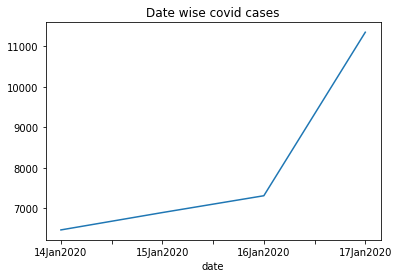

In [146]:
# Displaying datewise total no of cases
Daily_count.plot(title='Date wise covid cases')